<a href="https://colab.research.google.com/github/Sindhura942/DeepLearning/blob/main/Regression_Model_Employees_Salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score ,mean_absolute_error , mean_squared_error
import tensorflow as tf

In [89]:
data = pd.read_csv("Employee_Salary_Data.csv")

In [90]:
X = data['Years_Experience'].values.reshape(-1,1)
Y = data['Annual_Salary'].values.reshape(-1,1)

In [91]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [92]:
X_scaler = StandardScaler()
Y_scaler = StandardScaler()

In [93]:
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
Y_train_scaled = Y_scaler.fit_transform(Y_train)
Y_test_scaled = Y_scaler.transform(Y_test)


In [94]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(65,activation = 'relu', input_shape = (1,)),     #First Hidden Layer
    tf.keras.layers.Dense(17,activation = 'relu'),                         #Second Hidden Layer
    tf.keras.layers.Dense(1)
    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [95]:
model.compile(optimizer = 'adam' ,loss = 'mean_squared_error')

In [96]:
model.fit(X_train_scaled,Y_train_scaled , epochs = 100, verbose = 1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.9676
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.8730
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.8577
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.7582
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.7010 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.6517
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.6013
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.5581
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.5361
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.4916
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.4469
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.4038
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3807
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.3324
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3055
Epoch 16/100
2/2 ━

In [97]:
Y_pred_scaled = model.predict(X_test_scaled)
Y_pred = Y_scaler.inverse_transform(Y_pred_scaled)
Y_test_actual = Y_scaler.inverse_transform(Y_test_scaled)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


In [98]:
rmse = np.sqrt(mean_squared_error(Y_test_actual,Y_pred))
mae = mean_absolute_error(Y_test_actual,Y_pred)
mape = np.mean(np.abs((Y_test_actual - Y_pred)/ Y_test_actual)) * 100
r2 = r2_score(Y_test_actual ,Y_pred)

In [99]:
print("\nModel Performance:")
print("------------------------")
print(f"RMSE: ${rmse: .2f}")
print(f"MAE: ${mae: .2f}")
print(f"MAPE: {mape: .2f}%")
print(f"R2:  {r2: .4f}")


Model Performance:
------------------------
RMSE: $ 500.01
MAE: $ 430.27
MAPE:  0.49%
R2:   0.9996


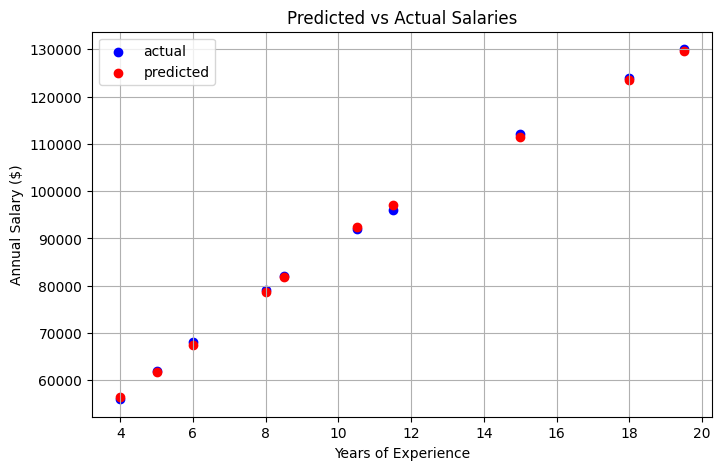

In [100]:
plt.figure(figsize=(8,5))
plt.scatter(X_test,Y_test_actual,color = 'blue', label = 'actual')
plt.scatter(X_test ,Y_pred , color = 'red' , label = 'predicted')
plt.title('Predicted vs Actual Salaries')
plt.xlabel('Years of Experience')
plt.ylabel('Annual Salary ($)')
plt.legend()
plt.grid(True)
plt.show()